
QC parameters:    

{'site': 'NPOL', 'scan_type': 'PPI', 'month': '11', 'day': '27', 'year': '2022', 'hh': '19', 'mm': '55', 'ss': '29', 'ref_field_name': 'CZ', 'phi_field_name': 'PH', 'zdr_field_name': 'DR', 'do_dbz': True, 'dbz_thresh': 5.0, 'do_rh': True, 'rh_thresh': 0.72, 'do_zdr': True, 'dr_min': -6.0, 'dr_max': 4.0, 'do_kdp': False, 'kdp_min': -2.0, 'kdp_max': 7.0, 'do_sq': False, 'sq_thresh': 0.45, 'do_sd': True, 'sd_thresh': 18.0, 'do_ph': False, 'ph_thresh': 80.0, 'dealias_velocity': False, 'do_ap': True, 'ap_dbz': 45, 'ap_zdr': 3, 'do_insect': False, 'do_despeckle': True, 'do_cos': False, 'coshmin': 0, 'coshmax': None, 'cosrmin': 0, 'cosrmax': 20, 'cosazmin': 0, 'cosazmax': 360, 'coselmin': 0, 'coselmax': 20.0, 'do_sector': False, 'sechmin': 0, 'sechmax': None, 'secrmin': 0, 'secrmax': 200, 'secazmin': 240, 'secazmax': 345, 'secelmin': 0, 'secelmax': 20.0, 'do_rh_sector': True, 'rhhmin': 0, 'rhhmax': None, 'rhrmin': 0, 'rhrmax': 50, 'rhazmin': 0, 'rhazmax': 360, 'rhelmin': 

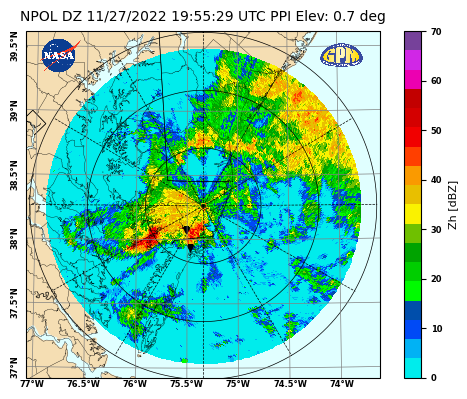

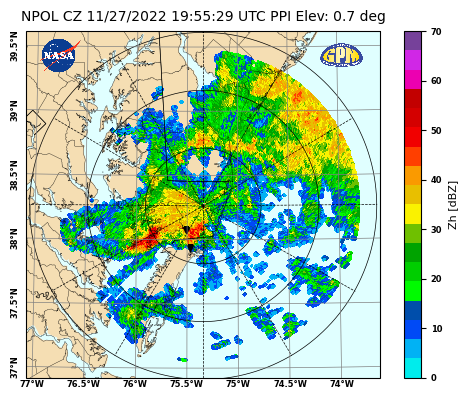

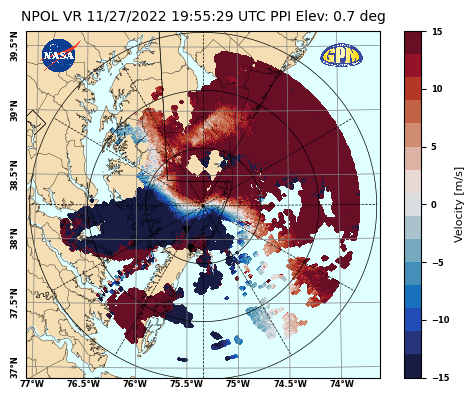

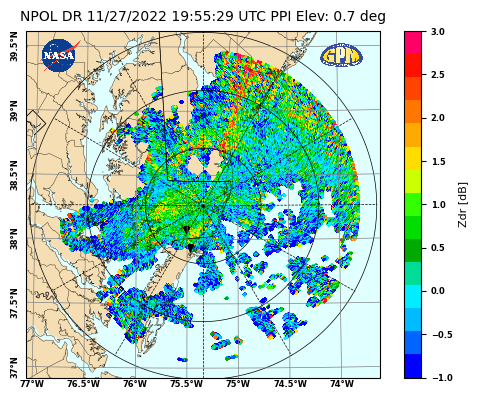

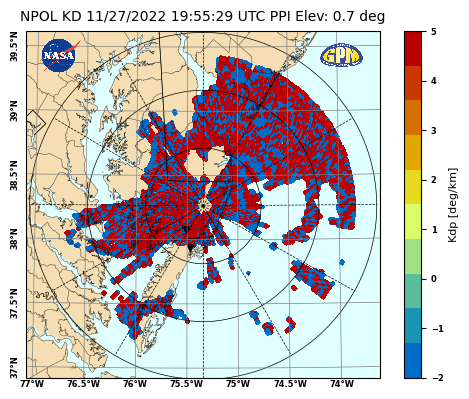

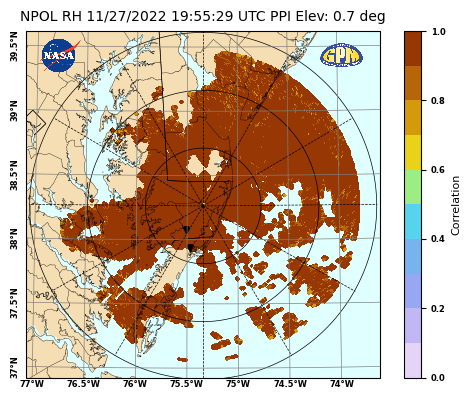

In [3]:
from gvradar import GVradar
import requests
import os

import warnings
warnings.filterwarnings("ignore")

# Read in file
response = requests.get('https://pmm-gv.gsfc.nasa.gov/pub/NPOL/Newark/2022/1127/ppi/np1221127195516.RAW2LD4.gz')
open("./np1221127195516.RAW2LD4.gz", "wb").write(response.content)

file = "./np1221127195516.RAW2LD4.gz"

kwargs = get_kwargs()

q = GVradar.QC(file, **kwargs)
qc_radar = q.run_dpqc()

os.remove(file)

In [1]:
def get_kwargs():
    
    kwargs = {}

    # Set DBZ threshold, values less than thresh will be masked.
    kwargs.update({'do_dbz': True, 'dbz_thresh': 5.0})

    # Set RHOhv threshold, values less than thresh will be masked.
    kwargs.update({'do_rh': True, 'rh_thresh': 0.72})

    # Set ZDR threshold, values outside of range will be masked.   
    kwargs.update({'do_zdr': True, 'dr_min': -6.0, 'dr_max': 4.0})

    # Set KDP threshold, values outside of range will be masked.
    kwargs.update({'do_kdp': False, 'kdp_min': -2.0, 'kdp_max': 7.0})

    # Set SQ threshold, values less than thresh will be masked.
    kwargs.update({'do_sq': False, 'sq_thresh': 0.45})

    # Set SD threshold, values greater than thresh will be masked.
    kwargs.update({'do_sd': True, 'sd_thresh': 18.0})

    # Set PH threshold, values less than thresh will be masked.
    kwargs.update({'do_ph': False, 'ph_thresh': 80.0})

    # Choose if you would like to dealias_the velocity field.
    kwargs.update({'dealias_velocity': False,}) 

    # Apply an AP filter, when DBZ is less then ap_dbz and ZDR is greater than ap_zdr, data will be masked.
    kwargs.update({'do_ap': True, 'ap_dbz': 45, 'ap_zdr': 3})

    # Apply CSU insect or despeckle filters.
    kwargs.update({'do_insect': False, 'do_despeckle': True})

    # Apply sector filters, Dual Pol thresholds can be applied to an user defined sector if needed.
    # Cone of silence filter, data within area will be masked.
    kwargs.update({'do_cos': False, 'coshmin': 0, 'coshmax': None, 'cosrmin': 0, 'cosrmax': 20,
                   'cosazmin': 0, 'cosazmax': 360, 'coselmin': 0, 'coselmax': 20.0})

    # Sector filter to masked all data, no thresholds needed.
    kwargs.update({'do_sector': False, 'sechmin': 0, 'sechmax': None, 'secrmin': 0, 'secrmax': 200,
                   'secazmin': 240, 'secazmax': 345, 'secelmin': 0, 'secelmax': 20.0})

    # Sector filter with RHOhv threshold, data in sector with values less than rh_sec will be masked.
    kwargs.update({'do_rh_sector': True, 'rhhmin': 0, 'rhhmax': None, 'rhrmin': 0, 'rhrmax': 50, 
                   'rhazmin': 0, 'rhazmax': 360, 'rhelmin': 0, 'rhelmax': 7.0, 'rh_sec': 0.92})

    # Sector filter with SD threshold, data in sector with values less than sd_sec will be masked.
    kwargs.update({'do_sd_sector': False, 'sdhmin': 0, 'sdhmax': None, 'sdrmin': 0, 'sdrmax': 75, 
                   'sdazmin': 0, 'sdazmax': 360, 'sdelmin': 0, 'sdelmax': 7.0, 'sd_sec': 8.0})

    # Sector filter with PH threshold, data in sector with values less than ph_sec will be masked.
    kwargs.update({'do_ph_sector': False, 'phhmin': 0, 'phhmax': None, 'phrmin': 0, 'phrmax': 200, 
                   'phazmin': 230, 'phazmax': 130, 'phelmin': 0, 'phelmax': 20.0, 'ph_sec': 80.0})

    # Apply calibration corrections if needed, both are subtracted.
    kwargs.update({'apply_cal': False, 'ref_cal': 0.2, 'zdr_cal': 0.0})

    ## There are two options for applying QC thresholds.

    # Apply QC thresholds based on height of the radar beam (km).
    # If True QC will be applied below qc_height.
    kwargs.update({'use_qc_height': True, 'qc_height': 4.4})

    # Apply QC based on the height of the freezing level.
    # If True, QC will only be applied below freeing level.
    kwargs.update({'use_sounding': False, 'sounding_type': 'ruc_archive',
                   'sounding_dir': './sounding/'})

    # Output CF file, fields to output, and output directory.
    kwargs.update({'output_cf': False,
                   'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD'],
                   'cf_dir': './cf'})

    # Select plot limits, plot type (single or multiplot), and fields to plot.
    kwargs.update({'plot_images': True, 'max_range': 150, 'max_height': 15, 
                   'sweeps_to_plot': [0], 'plot_single': True, 'plot_multi': False,'add_logos': True, 
                   'fields_to_plot': ['DZ','CZ', 'VR', 'DR', 'KD','RH'], 'plot_raw_images': False,
                   'plot_dir': './plots/'})
    
    return kwargs